# Chapter 4: Descriptive Statistics

In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np
import statistics

from collections import defaultdict, Counter
from typing import List, Tuple, Union

In [15]:
scores = [
    53, 87, 76, 73, 62, 99,
    78, 93, 82, 69, 65, 93,
    92, 92, 78, 82, 89, 65,
    63, 49, 88, 87, 94, 73,
    85, 77, 98, 59, 93, 82
]

print(np.mean(scores))
print(np.median(scores))

79.2
82.0


**mean**:
$$
\bar{x} = \frac{\sum \limits _{i=0} ^{n} x_i}{n}
$$

**standard deviation**: 
$$
s_1 = \sqrt{\overline {x^2} - \bar x^2}
$$
<br>
<center>where $\overline {x^2}$ is average of all the squares of all x's.

In [16]:
mean = np.mean(scores)
squares = sum(np.square(scores)) / len(scores)

In [17]:
def stdev_pop(items: List[float]) -> float:
    
    squares = sum(np.square(items)) / len(items)
    mean = np.mean(items)
    
    return math.sqrt(squares - mean**2)

assert round(stdev_pop(scores), 3) == round(np.std(scores), 3)

**sample correlation coefficient**:
$$
r(x, y) = \frac {\overline {xy} - \bar x \bar y} {s_{1x} s_{1y}}
$$
<br>
<center> where $\overline {xy}$ is the average value of the product of x and y.

In [18]:
scores2 = [74, 57, 62, 64, 69, 51,
           61, 54, 59, 66, 68, 54,
           54, 54, 61, 59, 56, 68,
           69, 76, 56, 57, 53, 64,
           58, 62, 51, 71, 54, 59]

In [19]:
products_avg = np.mean([x*y for x, y in zip(scores, scores2)])
product_of_avgs = np.mean(scores) * np.mean(scores2)
print(products_avg, product_of_avgs)

4716.833333333333 4807.4400000000005


In [20]:
def get_r(
    items1: List[float],
    items2: List[float]
) -> float:
    
    products_avg = np.mean([x*y for x, y in zip(items1, items2)])
    product_of_avgs = np.mean(items1) * np.mean(items2)
    
    return (products_avg - product_of_avgs) / (np.std(items1) * np.std(items2))

assert round(get_r(scores, scores2), 4) == round(np.corrcoef(scores, scores2)[0,1], 4)
print(get_r(scores, scores2))

-0.9993934828131141


**Exercise 1**: Calculate mean, median, mode, histogram for set of data.

In [21]:
data = [17, 18, 20, 22, 21, 19, 16, 15, 18, 20, 21, 21, 22, 21, 19, 20, 19, 17, 16, 16, 17]

In [22]:
def get_mean(items: List[float]) -> float:
    return sum(items) / len(items)

assert(get_mean(data)) == np.mean(data)

def get_median(items: List[float]) -> float:
        
    items = sorted(items)
    if len(items) % 2 != 0:
        return items[int(len(items)/2)]
    else:
        low = (len(items) // 2) - 1
        return (items[low] + items[low + 1]) / 2
    
assert get_median(data) == np.median(data)
assert get_median(data[:-1]) == np.median(data[:-1])

def get_mode(items: List[Union[float, str]]) -> Union[float, str]:
    """Inspired by Data Science from Scratch"""
    counts = Counter(items)
    max_count = max(counts.values())
    return [key for key, value in counts.items() if value == max_count]
    
assert get_mode(data) == statistics.multimode(data)
assert get_mode([1,1,2,2,3]) == statistics.multimode([1,1,2,2,3])

In [23]:
print(
f"mean: {round(get_mean(data), 2)}\n\
median: {get_median(data):.0f}\n\
mode: {get_mode(data)[0]}"
)

mean: 18.81
median: 19
mode: 21


Text(0.5, 1.0, 'Temperature histogram')

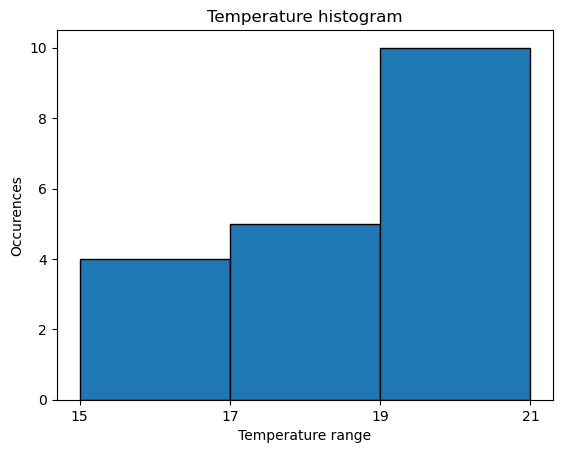

In [24]:
plt.hist(
    data,
    [x for x in range(15, max(data), 2)],
    edgecolor = (0, 0, 0)
)

plt.xticks(ticks=[x for x in range(15, max(data), 2)])
plt.xlabel("Temperature range")
plt.ylabel("Occurences")
plt.title("Temperature histogram")


**Exercise 2**: Calculate mean, median, mode, histogram for all positive perfect squares < 1000

In [25]:
perfect_sqs = []
x = 1
sq = x**2
while sq < 1000:
    perfect_sqs.append(sq)
    x += 1
    sq = x**2


print(
f"mean: {get_mean(perfect_sqs):.0f}\n\
median: {get_median(perfect_sqs):.0f}\n\
mode: all numbers"
)

mean: 336
median: 256
mode: all numbers


**Exercise 3**: Calculate mean, median, mode for data.

In [26]:
ex3 = [5, 10, 6, 11, 0, 0, 0, 10]
mean_ex3 = np.mean(ex3)
mode_ex3 = statistics.mode(ex3)
std_ex3 = np.std(ex3)

print(
f"mean: {mean_ex3}\n\
mode: {mode_ex3}\n\
std: {std_ex3:.2f}"
)

mean: 5.25
mode: 0
std: 4.49


In [27]:
# manually
sqrs_avg_ex3 = sum([x**2 for x in ex3]) / len(ex3)
avg_sqr_ex2 = (sum(ex3) / len(ex3))**2
print(f"standard deviation: {round(math.sqrt(sqrs_avg_ex3 - avg_sqr_ex2), 2)}")

standard deviation: 4.49


**Exercise 4**: Draw histogram, calculate mean std for earned-run avgs

In [28]:
ex4 = [3.8, 3.82, 3.87, 3.88, 3.95, 3.98, 3.99, 3.99, 4.03, 4.08, 4.11, 4.28, 4.54, 4.72]
print(f"mean: {np.mean(ex4):.2f}")
print(f"standard deviation: {np.std(ex4):.2f}")

mean: 4.07
standard deviation: 0.26


Text(0, 0.5, 'Counts')

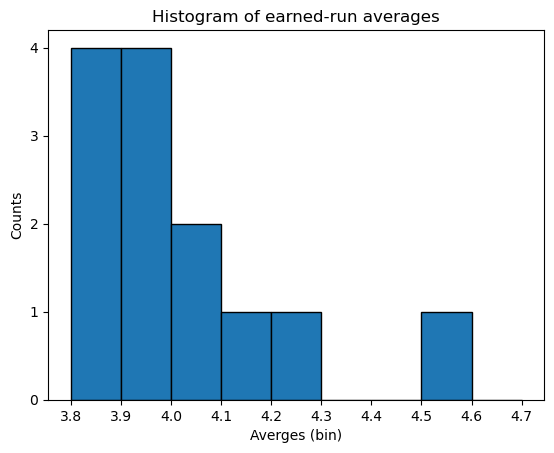

In [29]:
plt.hist(
    x=ex4,
    bins=np.arange(min(ex4), max(ex4), 0.1),
    edgecolor=(0, 0, 0)
)

plt.yticks([x for x in range(5)])
plt.xticks(np.arange(min(ex4), max(ex4), 0.1))
plt.title("Histogram of earned-run averages")
plt.xlabel("Averges (bin)")
plt.ylabel("Counts")


**Exercise 5**: Calculate correlation coefficent between English and History scores, and Chemistry and History scores.

In [30]:
english = [
    58, 88, 79, 76, 66, 99,
    80, 94, 84, 72, 69, 94,
    93, 92, 80, 84, 90, 69,
    67, 54, 90, 89, 95, 76,
    86, 80, 98, 63, 94, 84
]

chemistry = [
    76, 94, 88, 86, 81, 99,
    89, 96, 91, 84, 82, 96,
    96, 96, 89, 91, 94, 82,
    81, 74, 94, 93, 97, 86,
    92, 88, 99, 79, 96, 91
]

In [31]:
# History, English manually for practice
xy_bar_he = sum([x*y for x, y in zip(scores, english)]) / len(scores)
xbar_ybar_he = (sum(scores)/len(scores)) * (sum(english)/len(english))
s1_h = math.sqrt((sum([i**2 for i in scores])/len(scores)) - (sum(scores)/len(scores))**2)
s1_e = math.sqrt((sum([i**2 for i in english])/len(english)) - (sum(english)/len(english))**2)

cof_he = (xy_bar_he - xbar_ybar_he) / (s1_h * s1_e)
print(xy_bar_he)
print(xbar_ybar_he)
print(round(s1_h, 2))
print(round(s1_e, 2))
round(cof_he, 4)

6610.4
6449.52
13.4
12.02


0.9996

In [32]:
# manually for practice
xy_bar_hc = sum(x*y for x, y in zip(scores, chemistry)) / len(scores)
xbar_ybar_hc = sum(scores)/len(scores) * sum(chemistry) / len(chemistry)
s1_c = math.sqrt(sum([i**2 for i in chemistry])/len(chemistry) - (sum(chemistry)/len(chemistry))**2)

cof_hc = (xy_bar_hc - xbar_ybar_hc) / (s1_h * s1_c)
round(cof_hc, 4)

0.9992

**Exercise 7**: Calculate correlation coefficent between the following sets.

correlation:  0.962


Text(0.5, 1.0, 'Exercise 7')

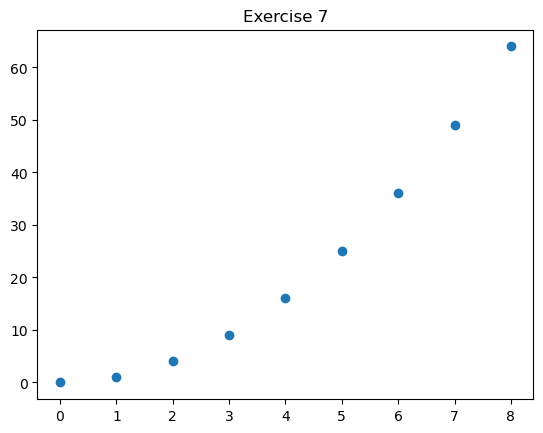

In [33]:
# a little more automation
x_7 = [i for i in range(9)]
y_7 = [0, 1, 4, 9, 16, 25, 36, 49, 64]

cor_7 = (
    ((sum([x*y for x, y in zip(x_7, y_7)])/len(x_7)) - (np.mean(x_7) * np.mean(y_7))) /
                            (np.std(x_7) * np.std(y_7))
)
print("correlation: ", round(cor_7, 3))
plt.scatter(x_7, y_7) # ahh not linear...
plt.title("Exercise 7")

**Exercise 8**: Calculate correlation coefficent between the following sets.

correlation:  1.0


Text(0.5, 1.0, 'Exercise 8')

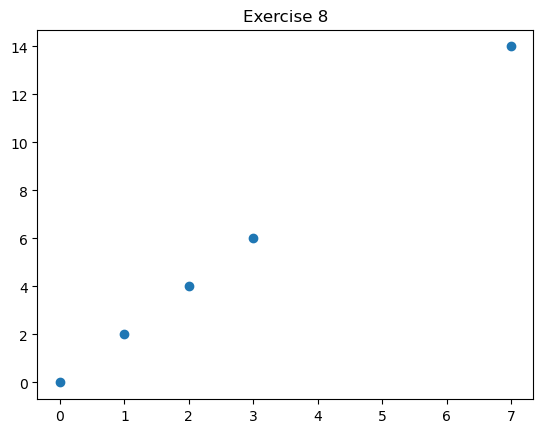

In [34]:
# w np
x_8 = [i for i in range(4)] + [7]
y_8 = [i for i in range(0, 7, 2)] + [14]
cor_8 = np.corrcoef(x_8, y_8)
print("correlation: ", cor_8[0,1])

plt.scatter(x_8, y_8)
plt.title("Exercise 8")

**Exercise 9**: Calculate correlation coefficent between the following sets.

0.0
0.0


Text(0.5, 1.0, 'Exercise 9')

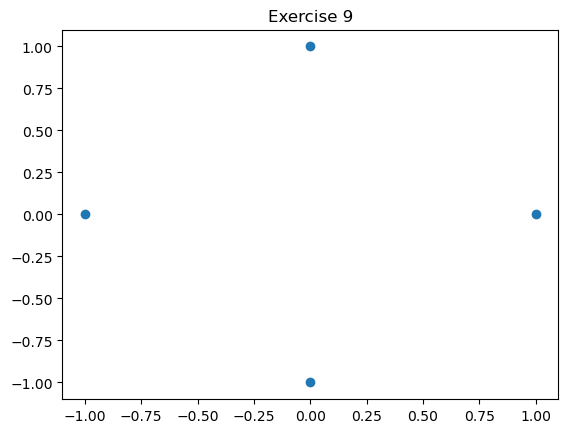

In [35]:
# my function
x_9 = [-1, 0, 1, 0]
y_9 = [0, -1, 0, 1]

print(get_r(x_9, y_9))
print(np.corrcoef(x_9, y_9)[0,1])

plt.scatter(x_9, y_9)
plt.title("Exercise 9")

**Exercise 10**: Make a list of friends/family, histogram of first letter.

Text(0.5, 1.0, 'Exersice 10')

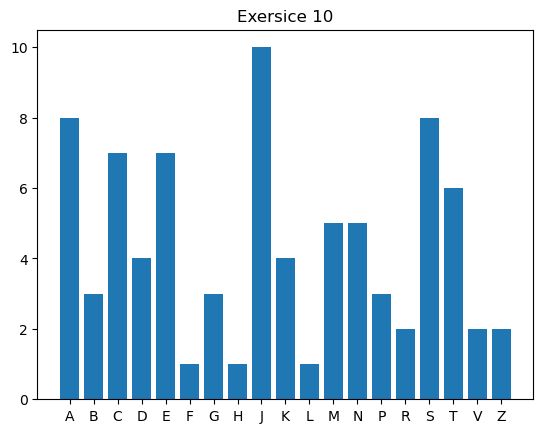

In [36]:
names = [
    "Tess", "Bob", "Zoe", "Elah", "Nina", "Harlow", "Pat", "Eva", "Daniel", "Dan",
    "Colette", "Cathy", "Tom", "Connie", "Elaine", "Paul", "Shauna", "Maggie", "Molly",
    "Fiona", "Rielly", "Rene", "Tom", "Vicky", "Joe", "Alex", "Marggie", "Carla", "Nick",
    "Tashie", "Satya", "James", "Alex", "Aleiko", "Jason", "George", "Armand", "Kobe", "Nick",
    "Karissa", "Buster", "Jeremiah", "Star", "Kenny", "Pete", "Coleen", "Vicky", "Ned", "Dennis",
    "Eddy", "Eddy", "Christie", "Sienna", "Jim", "Greg", "Amanda", "Jesse", "Bill", "Jimmmy", "Elisa",
    "Samantah", "Ed", "Dan", "Austin", "Abigail", "Arianna", "Julianan", "Joe", "Ken", "Colin",
    "Zev", "Molly", "Shannon", "Gummaro", "Silas", "Nancy", "Tim", "Laura", "Maria", "Sharon", "Jeff", "Teresa"
]

counts = sorted(Counter([name[0] for name in names]).items())
plt.bar(
    [x[0] for x in counts],
    [y[1] for y in counts]
)

plt.title("Exersice 10")

**Exercise 11**: Write a program to calculate average for a list.
- see answer to Exercise 1: _get_mean()_

In [37]:
assert get_mean([1, 2, 3]) == 2
assert get_mean([0]) == 0

**Exercise 12**: Write a program to calculate population _and_ sample standard deviation

In [38]:
def get_std(items: List[float], method="population") -> float:
    
    assert method in ["population", "sample"], "Method must be either 'population' or 'sample'"

    squares = sum(np.square(items)) / len(items)
    mean = np.mean(items)
    std = math.sqrt(squares - mean**2)
    
    if method == "sample":
        n = len(items)
        std = std * math.sqrt(n / (n - 1))
    
    return std
                            
array = np.random.randint(100, size=10)
assert round(get_std(array), 5) == round(np.std(array), 5)
assert round(get_std(array, 'sample'), 5) == round(np.std(array, ddof=1), 5)
assert get_std([1]) == 0

**Exercise 13**: Write a program to calculate correlation coefficient
- see _get_r()_

In [39]:
assert round(get_r(scores, scores2), 4) == round(np.corrcoef(scores, scores2)[0,1], 4)
assert get_r([-1, 0, 1, 0], [0, -1, 0, 1]) == 0

**Exercise 14-15**: Write a program to sort a list, use it to right a program to return a median

In [40]:
def bubble_sort(xs: List[float]) -> List[float]:
    """Classic bubble sort"""
    for j in range(len(xs)-1):
        for i in range(len(xs)-1):
            xs_cp = xs
            a = xs[i]
            b = xs[i+1]
            if a > b:
                xs_cp[i] = b
                xs_cp[i+1] = a
            xs = xs_cp
    return xs

def get_median2(xs: List[float]) -> float:
    
    xs = bubble_sort(xs)
    if len(xs) % 2 != 0:
        return xs[int(len(xs)/2)]
    else:
        low = (len(xs) // 2) - 1
        return (xs[low] + xs[low + 1]) / 2
assert get_median2([1,3,2]) == 2
assert get_median2([4,3,2,1]) == 2.5

**Exercise 16**: Write a program to make a histogram for a list of number, automatically compute bins